In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [62]:
print("Customers Dataset:")
print(customers.info())  # Summary of columns and data types
print(customers.head())  # First few rows



Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [63]:
print("\nProducts Dataset:")
print(products.info())
print(products.head())



Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [64]:
print("\nTransactions Dataset:")
print(transactions.info())
print(transactions.head())


Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P06

In [65]:
customer_transactions = pd.merge(transactions, customers, on="CustomerID")

In [66]:
full_data = pd.merge(customer_transactions, products, on="ProductID")

In [67]:
full_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


## **Task 1**

In [68]:
# 3. Check for missing values
print("\nMissing Values:")
print(full_data.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [69]:
# 4. Summary statistics
print("\nSummary Statistics:")
print(full_data.describe())


Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [70]:
# 5. Analyze total sales by region
region_sales = full_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nTotal Sales by Region:")
print(region_sales)


Total Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


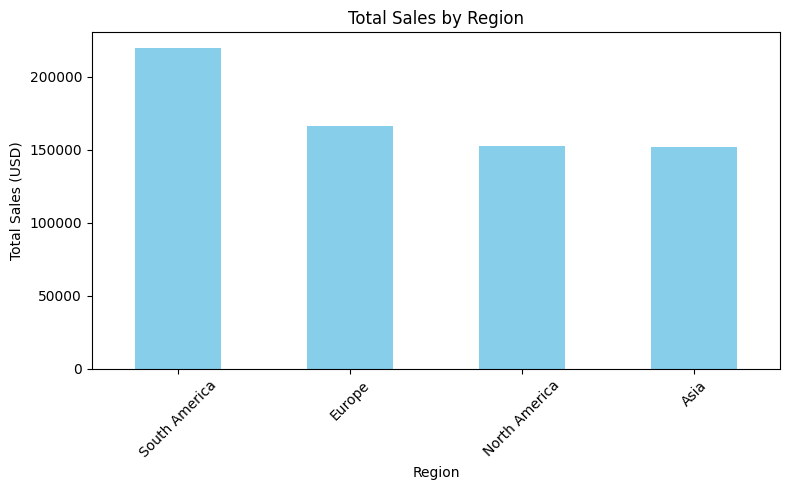

In [71]:
# Plot region sales
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Region")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
# 6. Analyze top-selling products
top_products = full_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
print("\nTop-Selling Products:")
print(top_products)


Top-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


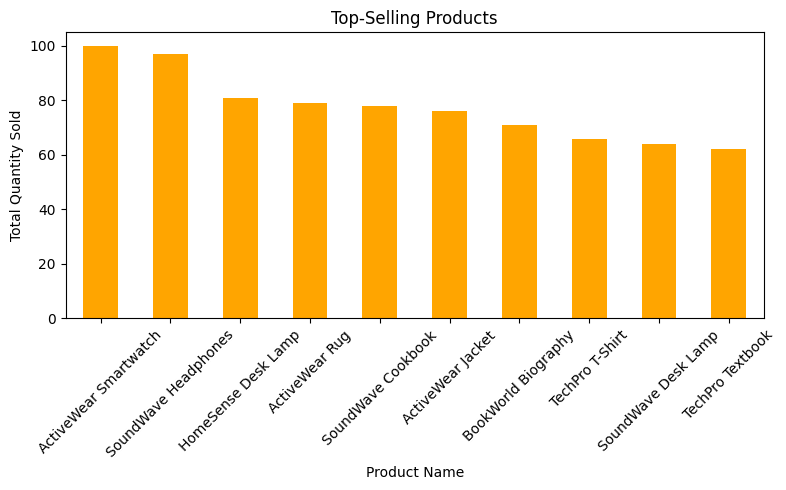

In [73]:
# Plot top products
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='orange')
plt.title("Top-Selling Products")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
# 7. Analyze sales trends over time
full_data["TransactionDate"] = pd.to_datetime(full_data["TransactionDate"])
sales_trends = full_data.groupby(full_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()

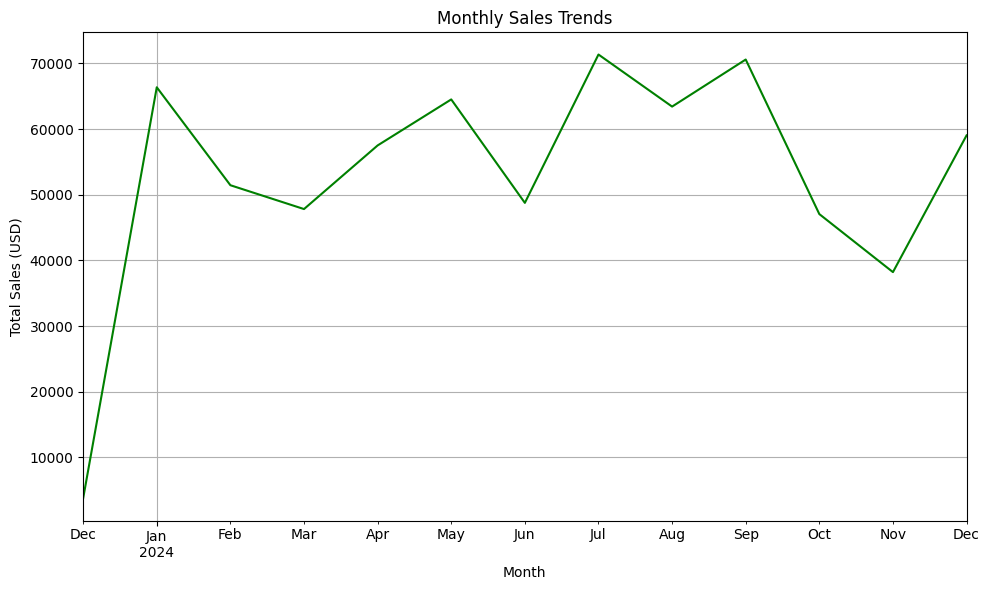

In [75]:
# Plot sales trends
plt.figure(figsize=(10, 6))
sales_trends.plot(color='green')
plt.title("Monthly Sales Trends")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Month")
plt.grid()
plt.tight_layout()
plt.show()

In [76]:
# 8. Analyze average spending by region
avg_spending = full_data.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
print("\nAverage Spending by Region:")
print(avg_spending)


Average Spending by Region:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


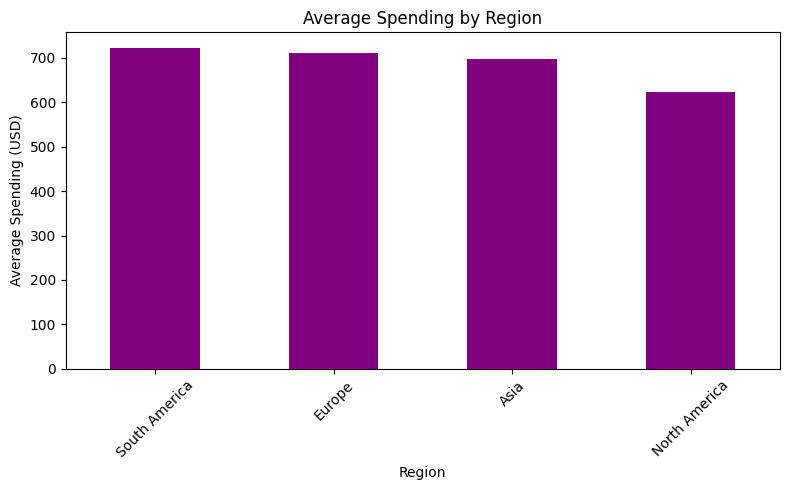

In [77]:
# Plot average spending
plt.figure(figsize=(8, 5))
avg_spending.plot(kind='bar', color='purple')
plt.title("Average Spending by Region")
plt.ylabel("Average Spending (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I try to extract some feature and provide some more inside

In [78]:
clv = full_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False)
print("\nCustomer Lifetime Value (Top 5):")
print(clv.head())




Customer Lifetime Value (Top 5):
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [79]:
# Insight 1: Top customers contribute disproportionately to revenue.
top_customers_percentage = (clv.head(10).sum() / clv.sum()) * 100
print(f"Top 10 customers contribute {top_customers_percentage:.2f}% of total revenue.")

Top 10 customers contribute 11.02% of total revenue.


In [80]:
# Feature 2: Product Revenue Contribution
product_revenue = full_data.groupby("ProductName")["TotalValue"].sum()
product_revenue_percentage = (product_revenue / product_revenue.sum()) * 100
top_products_revenue = product_revenue_percentage.sort_values(ascending=False).head(5)
print("\nTop 5 Products by Revenue Contribution (%):")
print(top_products_revenue)


Top 5 Products by Revenue Contribution (%):
ProductName
ActiveWear Smartwatch    5.666264
SoundWave Headphones     3.653884
SoundWave Novel          3.551892
ActiveWear Jacket        3.291697
ActiveWear Rug           3.233996
Name: TotalValue, dtype: float64


In [81]:
# Insight 2: A small number of products generate the majority of revenue.
top_product_percentage = top_products_revenue.sum()
print(f"The top 5 products account for {top_product_percentage:.2f}% of total revenue.")

The top 5 products account for 19.40% of total revenue.


In [82]:
# Feature 3: Repeat Customers
repeat_customers = full_data.groupby("CustomerID").size()
repeat_customers_count = (repeat_customers > 1).sum()
total_customers = len(repeat_customers)
repeat_customer_percentage = (repeat_customers_count / total_customers) * 100
print("\nPercentage of Repeat Customers:")
print(f"{repeat_customer_percentage:.2f}% of customers made more than one purchase.")


Percentage of Repeat Customers:
93.97% of customers made more than one purchase.


In [83]:
# Feature 4: Time to First Purchase
full_data["SignupDate"] = pd.to_datetime(full_data["SignupDate"])
time_to_first_purchase = full_data.groupby("CustomerID").apply(
    lambda x: (x["TransactionDate"].min() - x["SignupDate"].min()).days
)
print("\nTime to First Purchase (Average):")
print(f"On average, customers take {time_to_first_purchase.mean():.2f} days to make their first purchase.")


Time to First Purchase (Average):
On average, customers take 228.76 days to make their first purchase.


<ipython-input-83-8552180f2c14>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_to_first_purchase = full_data.groupby("CustomerID").apply(


### **Task 2**

Lookalike Recommendations for First 20 Customers:
  CustomerID LookalikeCustomerID     Score
0      C0001               C0107  0.996781
1      C0001               C0137  0.996133
2      C0001               C0184  0.996082
3      C0002               C0088  0.998174
4      C0002               C0142  0.994310
5      C0002               C0159  0.989536
6      C0003               C0147  0.997951
7      C0003               C0190  0.997257
8      C0003               C0174  0.983825
9      C0004               C0113  0.994517


**Task 3**